**Yêu cầu a)** Nhập dữ liệu đầu vào và tiến hành tiền xử lý xóa các dòng dữ liệu trống, sửa tên
các cột dữ liệu lại như sau để dễ theo dõi: 'age', 'sex', 'chest_pain_type',
'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope',
'num_major_vessels', 'thalassemia', 'target'.

In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
print("Huỳnh Thị Trúc Lam - 6351071040")

# Đọc dữ liệu
df = pd.read_csv("/content/heart.csv")

# In số lượng dòng
print("Số dòng dữ liệu:", df.shape[0])

Huỳnh Thị Trúc Lam - 6351071040
Số dòng dữ liệu: 303


In [5]:
# Xóa các dòng dữ liệu trống (nếu có)
df.dropna(inplace=True)

print(f"Số dòng dữ liệu sau khi xóa các dòng trống: {df.shape[0]}")

Số dòng dữ liệu sau khi xóa các dòng trống: 303


In [6]:
# Đổi tên các cột dữ liệu
new_column_names = [
    'age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol',
    'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
    'exercise_induced_angina', 'st_depression', 'st_slope',
    'num_major_vessels', 'thalassemia', 'target'
]

df.columns = new_column_names

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

None

**Yêu cầu 3:** Khảo sát độ tương đồng giữa các cột với nhau bằng công thức Pearson. Những cột nào có giá trị tương đồng cao thì hãy loại bỏ.

In [8]:
# Chọn các cột số
numeric_df = df.select_dtypes(include=["int64", "float64"])

# Tính ma trận tương quan Pearson
corr_matrix = numeric_df.corr(method="pearson")

print("=== MA TRẬN TƯƠNG QUAN PEARSON ===")
display(corr_matrix)

# Tìm các cặp cột có tương quan cao
threshold = 0.8
high_corr_pairs = []

for i in corr_matrix.columns:
    for j in corr_matrix.columns:
        # Đảm bảo không so sánh cột với chính nó và chỉ thêm một lần mỗi cặp
        if i != j and abs(corr_matrix.loc[i, j]) > threshold and (j, i, corr_matrix.loc[j, i]) not in high_corr_pairs:
            high_corr_pairs.append((i, j, corr_matrix.loc[i, j]))


if len(high_corr_pairs) == 0:
    print(f"\nKhông có cặp cột nào có tương quan lớn hơn {threshold}")
else:
    print(f"\n=== CÁC CẶP CỘT CÓ TƯƠNG QUAN CAO (>|{threshold}|) ===")
    for c1, c2, val in high_corr_pairs:
        print(f"{c1}  <-->  {c2}   :  {val:.3f}")

# Loại bỏ một trong các cột có tương quan cao (ví dụ: giữ lại cột đầu tiên trong cặp)
columns_to_drop = set()
for c1, c2, val in high_corr_pairs:
    columns_to_drop.add(c2) # Chọn cột thứ hai trong cặp để loại bỏ

if len(columns_to_drop) > 0:
    print(f"\nCác cột sẽ bị loại bỏ do tương quan cao: {list(columns_to_drop)}")
    df_cleaned = df.drop(columns=list(columns_to_drop))
    print(f"Số cột ban đầu: {df.shape[1]}")
    print(f"Số cột sau khi loại bỏ: {df_cleaned.shape[1]}")
    df = df_cleaned # Cập nhật DataFrame chính
    display(df.head())
else:
    print("\nKhông có cột nào bị loại bỏ do tương quan cao.")

print("\nHuỳnh Thị Trúc Lam - 6351071040")

=== MA TRẬN TƯƠNG QUAN PEARSON ===


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain_type,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
resting_blood_pressure,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholesterol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
rest_ecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
max_heart_rate_achieved,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exercise_induced_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
st_depression,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696



Không có cặp cột nào có tương quan lớn hơn 0.8

Không có cột nào bị loại bỏ do tương quan cao.

Huỳnh Thị Trúc Lam - 6351071040


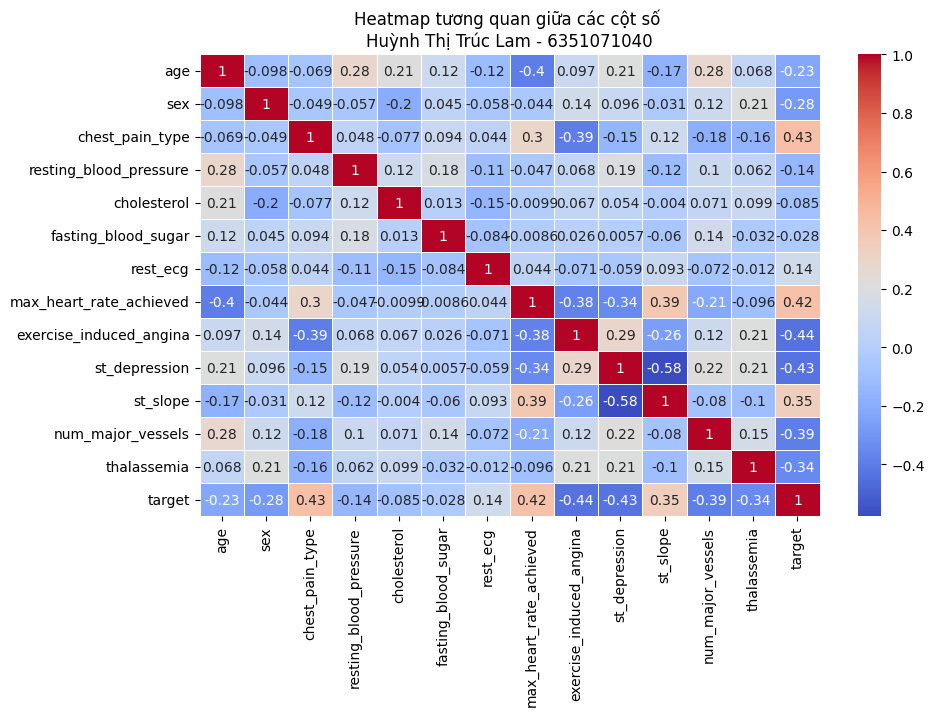

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap tương quan giữa các cột số \nHuỳnh Thị Trúc Lam - 6351071040")
plt.show()

**Yêu cầu 4:** Tách các cột dữ liệu thành hai phần, một phần chứa các thuộc tính bình thường, một phần chứa riêng thuộc tính quyết định.

In [14]:
fearures = df.drop(columns=["target"], axis=1)
labels = df["target"]
print("\nHuỳnh Thị Trúc Lam - 6351071040")

print("Kích thước của đặc trưng:", fearures.shape)
print("Kích thước của nhãn:", labels.shape)


Huỳnh Thị Trúc Lam - 6351071040
Kích thước của đặc trưng: (303, 13)
Kích thước của nhãn: (303,)


**Yêu cầu 5:** Chuyển đổi các cột không phải dạng số về dạng one-hot
vector để phù hợp với đầu vào của thư viện.

In [15]:
print("\nHuỳnh Thị Trúc Lam - 6351071040")
fearures_onehot=pd.get_dummies(
    fearures,
    columns=fearures.select_dtypes(exclude=["int64", "float64"]).columns,
    drop_first=True   # tránh đa cộng tuyến
)

fearures_onehot


Huỳnh Thị Trúc Lam - 6351071040


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


**Yêu cầu 6:** Tách các dòng dữ liệu ra thành hai phần huấn luyện và kiểm thử (6:4)

In [16]:
# Tách dữ liệu thành tập huấn luyện và tập kiểm thử (60% huấn luyện, 40% kiểm thử)
X_train, X_test, y_train, y_test = train_test_split(
    fearures_onehot, labels, test_size=0.4, random_state=42
)

print("Kích thước tập huấn luyện X_train:", X_train.shape)
print("Kích thước tập kiểm thử X_test:", X_test.shape)
print("Kích thước nhãn huấn luyện y_train:", y_train.shape)
print("Kích thước nhãn kiểm thử y_test:", y_test.shape)

print("\nHuỳnh Thị Trúc Lam - 6351071040")

Kích thước tập huấn luyện X_train: (181, 13)
Kích thước tập kiểm thử X_test: (122, 13)
Kích thước nhãn huấn luyện y_train: (181,)
Kích thước nhãn kiểm thử y_test: (122,)

Huỳnh Thị Trúc Lam - 6351071040


**Yêu cầu 7:** Xây dựng cây ID3 dựa trên dữ liệu huấn luyện và sau đó tiến hành kiểm thử kết quả của cây bằng ma trận nhầm lẫn. Biểu diễn cây vào trong kết quả thực hiện.

In [20]:
# Khởi tạo mô hình Decision Tree Classifier với tiêu chí 'entropy' (tương tự ID3)
id3_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Huấn luyện mô hình trên tập dữ liệu huấn luyện
id3_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [18]:
# Dự đoán trên tập kiểm thử
y_pred = id3_tree.predict(X_test)

# Tính toán và in ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred)
print("=== MA TRẬN NHẦM LẪN ===")
print(conf_matrix)

# Tính toán và in độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"\nĐộ chính xác (Accuracy): {accuracy:.2f}")

# In báo cáo phân loại chi tiết
print("\n=== BÁO CÁO PHÂN LOẠI ===")
print(classification_report(y_test, y_pred))

print("\nHuỳnh Thị Trúc Lam - 6351071040")

=== MA TRẬN NHẦM LẪN ===
[[41 11]
 [15 55]]

Độ chính xác (Accuracy): 0.79

=== BÁO CÁO PHÂN LOẠI ===
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        52
           1       0.83      0.79      0.81        70

    accuracy                           0.79       122
   macro avg       0.78      0.79      0.78       122
weighted avg       0.79      0.79      0.79       122


Huỳnh Thị Trúc Lam - 6351071040


### Biểu diễn cây quyết định

Biểu diễn cây ID3:


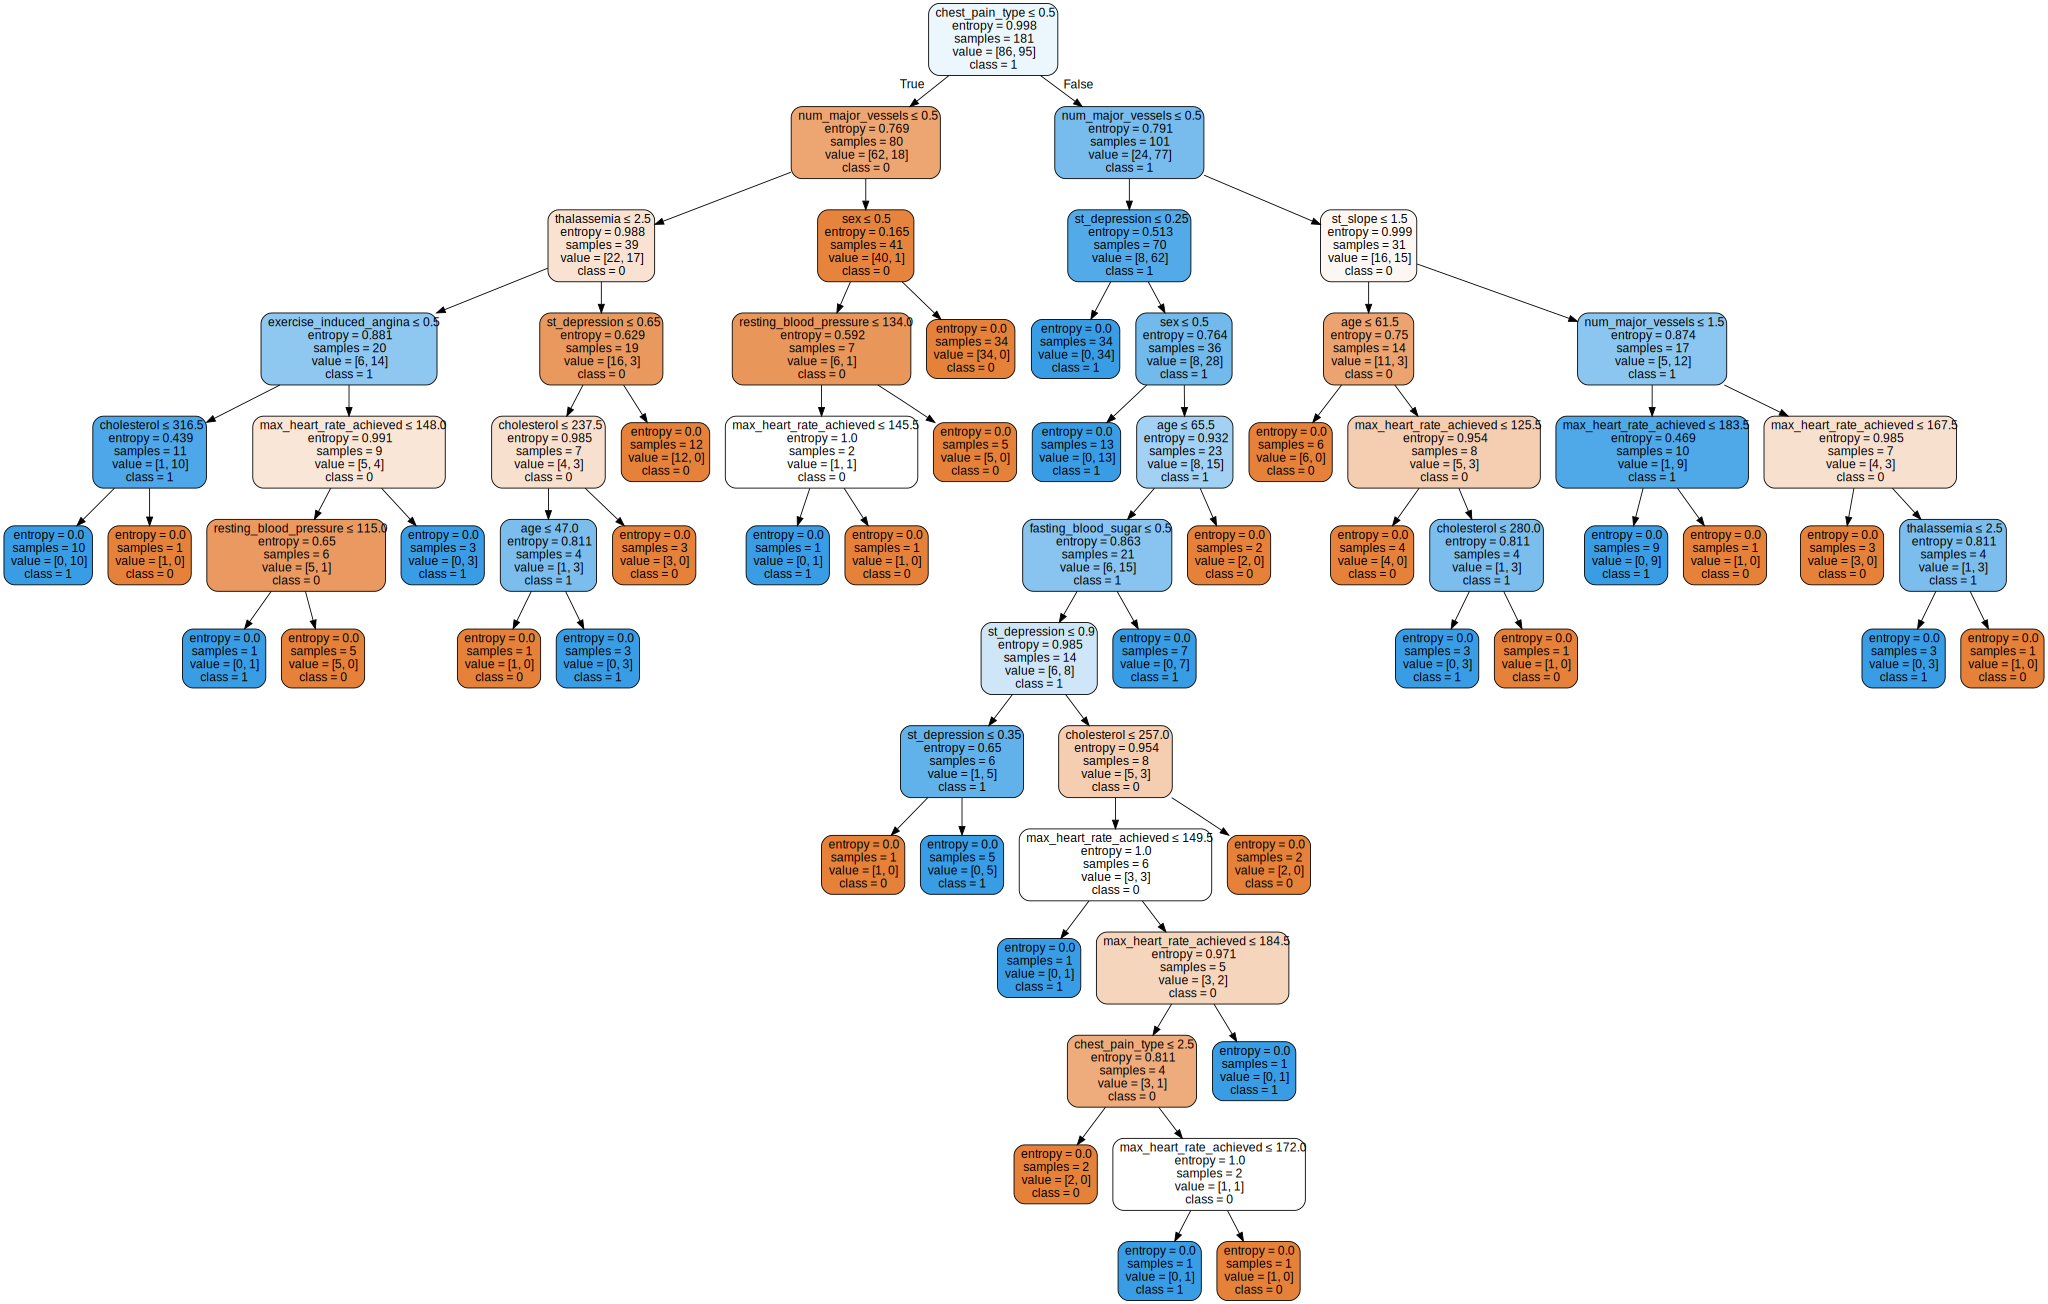


Huỳnh Thị Trúc Lam - 6351071040


In [19]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# Xuất cây quyết định sang định dạng DOT
dot_data = export_graphviz(
    id3_tree,
    out_file=None,
    feature_names=X_train.columns,
    class_names=[str(c) for c in id3_tree.classes_],
    filled=True,
    rounded=True,
    special_characters=True
)

# Tạo đối tượng Graphviz từ chuỗi DOT
graph = graphviz.Source(dot_data)

# Lưu và hiển thị cây quyết định
# graph.render("id3_tree", format="png", view=True) # Để lưu file ảnh và tự động mở

print("Biểu diễn cây ID3:")
display(graph)

print("\nHuỳnh Thị Trúc Lam - 6351071040")


Huỳnh Thị Trúc Lam - 6351071040


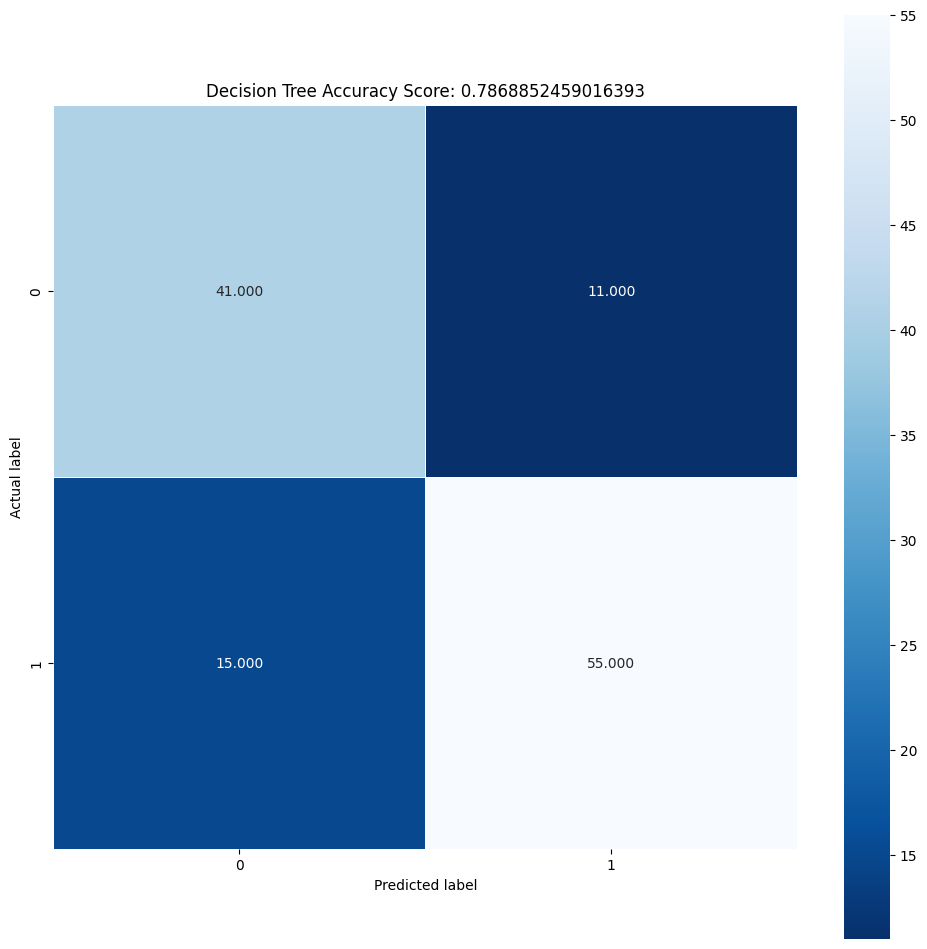

In [22]:
plt.figure(figsize=(12,12))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True,cmap="Blues_r" )
plt.title(f"Decision Tree Accuracy Score: {accuracy_score(y_test, y_pred)}")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("\nHuỳnh Thị Trúc Lam - 6351071040")

**Yêu cầu 8:** Lặp lại yêu cầu 7 đối với cây CART.

In [25]:
# Khởi tạo mô hình Decision Tree Classifier với tiêu chí 'gini' (mặc định, tương tự CART)
cart_tree = DecisionTreeClassifier(criterion='gini', random_state=42)

# Huấn luyện mô hình trên tập dữ liệu huấn luyện
cart_tree.fit(X_train, y_train)

print("Đã huấn luyện cây CART thành công!")
print("\nHuỳnh Thị Trúc Lam - 6351071040")

Đã huấn luyện cây CART thành công!

Huỳnh Thị Trúc Lam - 6351071040


### Kiểm thử kết quả cây CART và ma trận nhầm lẫn

In [26]:
# Dự đoán trên tập kiểm thử
y_pred_cart = cart_tree.predict(X_test)

# Tính toán và in ma trận nhầm lẫn
conf_matrix_cart = confusion_matrix(y_test, y_pred_cart)
print("=== MA TRẬN NHẦM LẪN (CART) ===")
print(conf_matrix_cart)

# Tính toán và in độ chính xác
accuracy_cart = accuracy_score(y_test, y_pred_cart)
print(f"\nĐộ chính xác (Accuracy) của cây CART: {accuracy_cart:.2f}")

# In báo cáo phân loại chi tiết
print("\n=== BÁO CÁO PHÂN LOẠI (CART) ===")
print(classification_report(y_test, y_pred_cart))

print("\nHuỳnh Thị Trúc Lam - 6351071040")

=== MA TRẬN NHẦM LẪN (CART) ===
[[39 13]
 [17 53]]

Độ chính xác (Accuracy) của cây CART: 0.75

=== BÁO CÁO PHÂN LOẠI (CART) ===
              precision    recall  f1-score   support

           0       0.70      0.75      0.72        52
           1       0.80      0.76      0.78        70

    accuracy                           0.75       122
   macro avg       0.75      0.75      0.75       122
weighted avg       0.76      0.75      0.76       122


Huỳnh Thị Trúc Lam - 6351071040


### Biểu diễn cây CART

Biểu diễn cây CART:


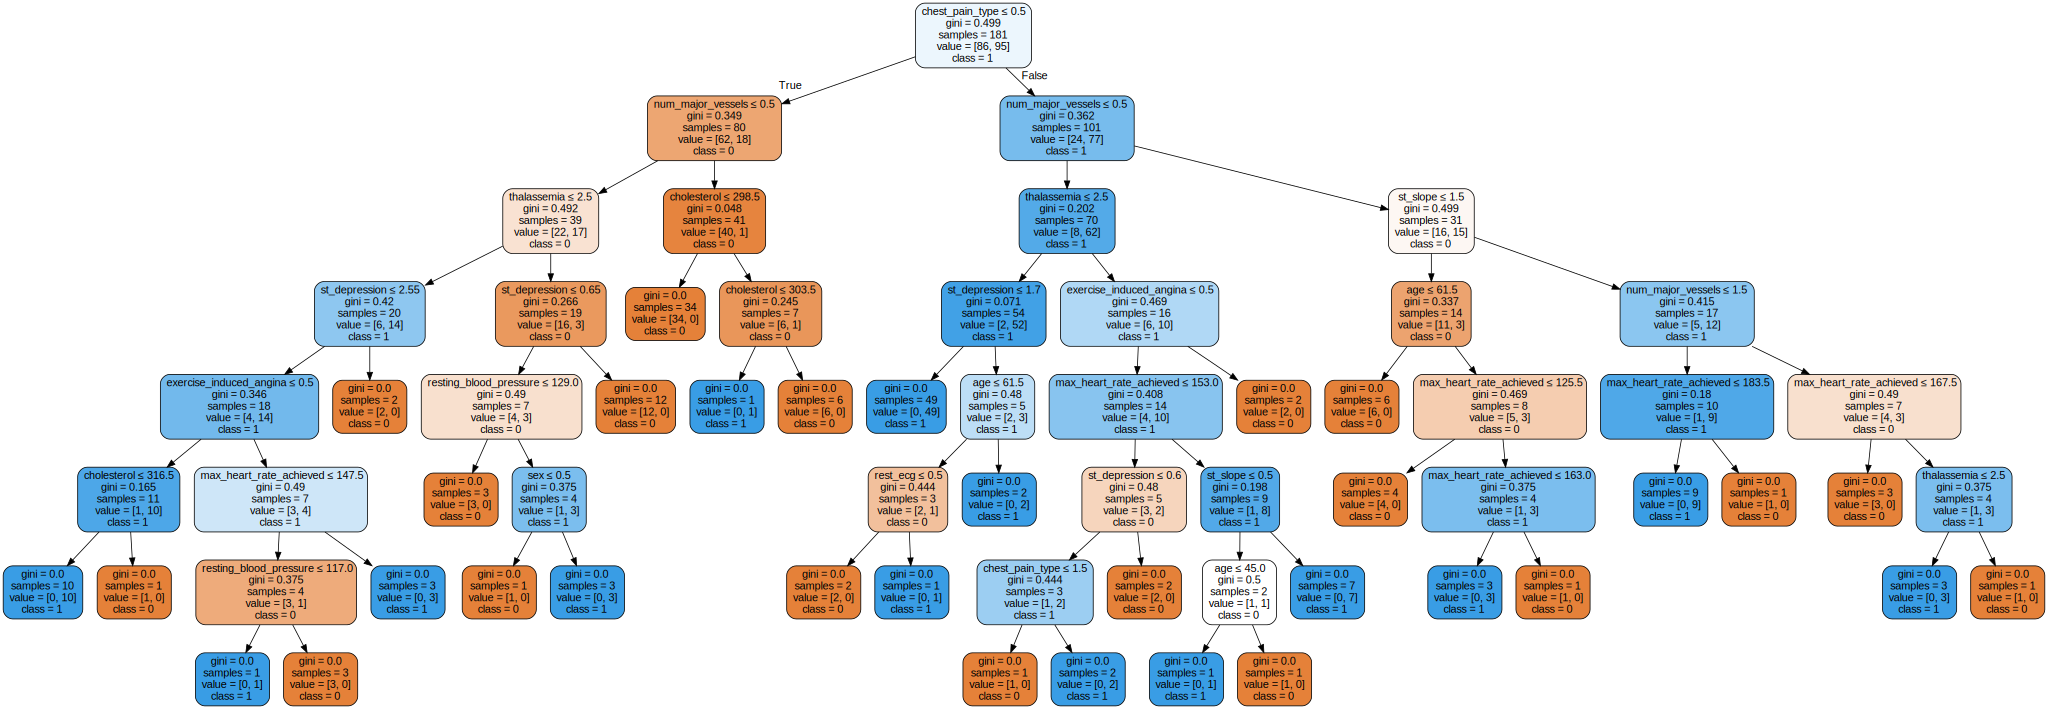


Huỳnh Thị Trúc Lam - 6351071040


In [27]:
from sklearn.tree import export_graphviz
import graphviz

# Xuất cây quyết định CART sang định dạng DOT
dot_data_cart = export_graphviz(
    cart_tree,
    out_file=None,
    feature_names=X_train.columns,
    class_names=[str(c) for c in cart_tree.classes_],
    filled=True,
    rounded=True,
    special_characters=True
)

# Tạo đối tượng Graphviz từ chuỗi DOT
graph_cart = graphviz.Source(dot_data_cart)

print("Biểu diễn cây CART:")
display(graph_cart)

print("\nHuỳnh Thị Trúc Lam - 6351071040")

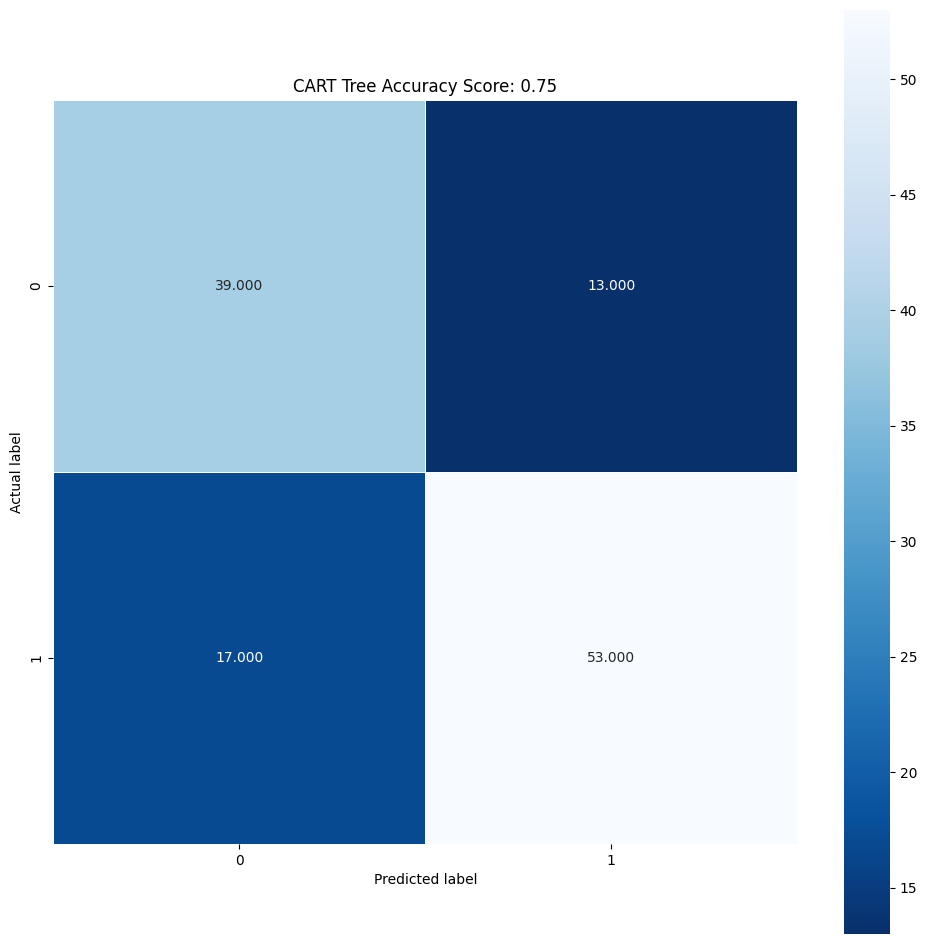


Huỳnh Thị Trúc Lam - 6351071040


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(conf_matrix_cart, annot=True, fmt=".3f", linewidths=.5, square = True,cmap="Blues_r" )
plt.title(f"CART Tree Accuracy Score: {accuracy_cart:.2f}")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
print("\nHuỳnh Thị Trúc Lam - 6351071040")

**Yêu cầu 9:** Xây dựng mô hình phân lớp bằng thuật toán Naïve Bayes và kiểm tra kết quả đạt được. Đối với thuật toán Naïve Bayes, sinh viên cũng làm tương tự với câu lệnh

In [29]:
from sklearn.naive_bayes import GaussianNB

# Khởi tạo mô hình Gaussian Naïve Bayes
naive_bayes_model = GaussianNB()

# Huấn luyện mô hình trên tập dữ liệu huấn luyện
naive_bayes_model.fit(X_train, y_train)

print("Đã huấn luyện mô hình Naïve Bayes thành công!")
print("\nHuỳnh Thị Trúc Lam - 6351071040")

Đã huấn luyện mô hình Naïve Bayes thành công!

Huỳnh Thị Trúc Lam - 6351071040


### Kiểm thử kết quả mô hình Naïve Bayes và ma trận nhầm lẫn

In [30]:
# Dự đoán trên tập kiểm thử
y_pred_nb = naive_bayes_model.predict(X_test)

# Tính toán và in ma trận nhầm lẫn
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("=== MA TRẬN NHẦM LẪN (Naïve Bayes) ===")
print(conf_matrix_nb)

# Tính toán và in độ chính xác
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"\nĐộ chính xác (Accuracy) của mô hình Naïve Bayes: {accuracy_nb:.2f}")

# In báo cáo phân loại chi tiết
print("\n=== BÁO CÁO PHÂN LOẠI (Naïve Bayes) ===")
print(classification_report(y_test, y_pred_nb))

print("\nHuỳnh Thị Trúc Lam - 6351071040")

=== MA TRẬN NHẦM LẪN (Naïve Bayes) ===
[[44  8]
 [12 58]]

Độ chính xác (Accuracy) của mô hình Naïve Bayes: 0.84

=== BÁO CÁO PHÂN LOẠI (Naïve Bayes) ===
              precision    recall  f1-score   support

           0       0.79      0.85      0.81        52
           1       0.88      0.83      0.85        70

    accuracy                           0.84       122
   macro avg       0.83      0.84      0.83       122
weighted avg       0.84      0.84      0.84       122


Huỳnh Thị Trúc Lam - 6351071040


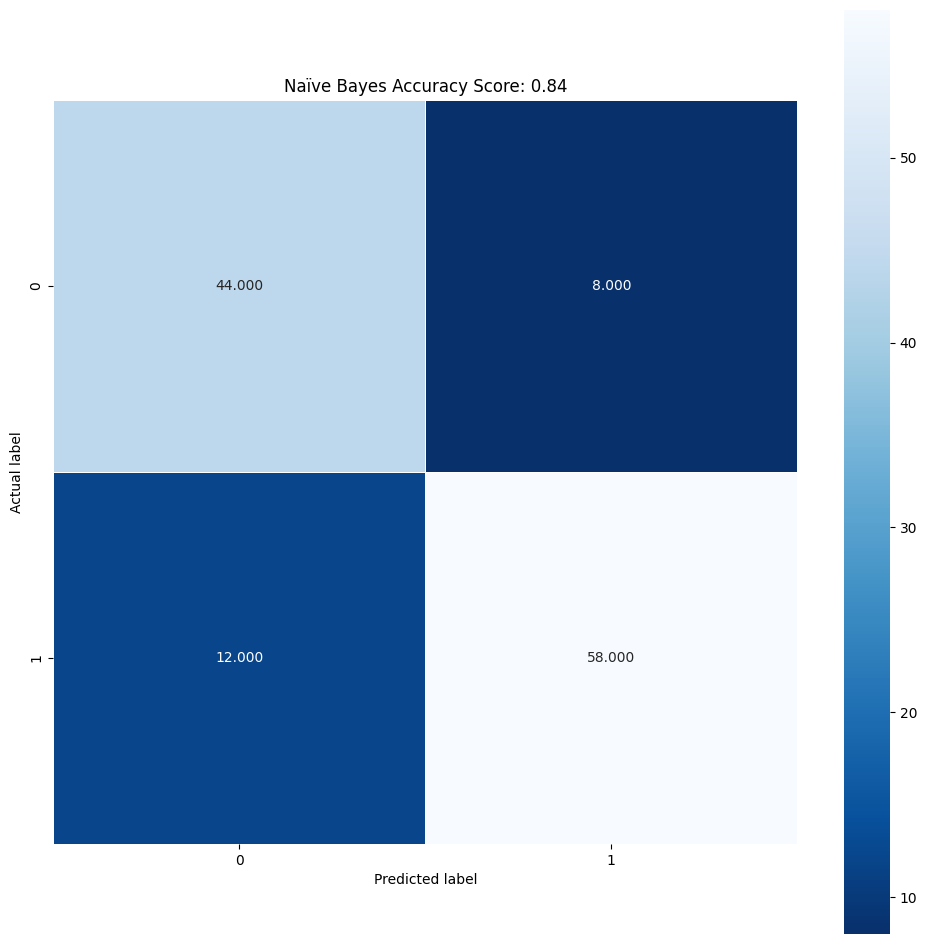


Huỳnh Thị Trúc Lam - 6351071040


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(conf_matrix_nb, annot=True, fmt=".3f", linewidths=.5, square = True,cmap="Blues_r" )
plt.title(f"Naïve Bayes Accuracy Score: {accuracy_nb:.2f}")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
print("\nHuỳnh Thị Trúc Lam - 6351071040")

**Yêu cầu 10** Dựa vào các thông tin đã thu được, sinh viên tự đưa ra nhận xét, so sánh kết quả của các mô hình trên.


| Mô hình       | Độ chính xác (Accuracy) |
| :------------ | :---------------------- |
| **ID3**       | 0.79                    |
| **CART**      | 0.75                    |
| **Naïve Bayes** | **0.84**                |

### Nhận xét:

Dựa trên kết quả độ chính xác:

*   **Mô hình Naïve Bayes** cho thấy hiệu suất tốt nhất với độ chính xác cao nhất là **0.84**.
*   **Mô hình ID3** đứng thứ hai với độ chính xác **0.79**.
*   **Mô hình CART** có độ chính xác thấp nhất là **0.75** trong số ba mô hình đã được thử nghiệm.

Điều này gợi ý rằng, trong trường hợp tập dữ liệu và cách tiền xử lý hiện tại, thuật toán Naïve Bayes là lựa chọn phù hợp nhất để dự đoán.